In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Seg3D/KiTS2019/kits19'

/content/drive/MyDrive/Seg3D/KiTS2019/kits19


In [6]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/shijianjian/EfficientNet-PyTorch-3D to /tmp/pip-req-build-v9anpkmm
  Running command git clone --filter=blob:none --quiet https://github.com/shijianjian/EfficientNet-PyTorch-3D /tmp/pip-req-build-v9anpkmm
  Resolved https://github.com/shijianjian/EfficientNet-PyTorch-3D to commit c13e36455573a55dea2ae4d5d09c85e01e654a7d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement efficientnet-pytorch-3d==0.6.3 (from versions: none)
ERROR: No matching distribution found for efficientnet-pytorch-3d==0.6

In [10]:
!pip install torchio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 5.0 MB/s eta 0:00:00
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 21.8 MB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Using cached commonmark-0.9.1-py2.py3-none-any.whl (51 kB)
  Attempting uninstall: rich
    Found existing installation: rich 13.3.4
    Uninstalling rich-13.3.4:
      Successfully uninstalled rich-13.3.4


In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader as load_batch

# from segment.data.prepare_data import get_dataset
from segment.data.data_readers.data_reader import DatasetReader
from segment.data.data_loaders.processor import DataProcessor

In [ ]:
# train_ds, valid_ds = get_dataset(
#     data_path="/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/train_val_data.json", 
#     out_path="/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/data",
#     config_path="configs/preprocess_pipeline.yaml",
#     fold=1
# ) 


In [ ]:
# [data for data in train_ds]

In [12]:
data = torch.load("/content/drive/MyDrive/Seg3D/KiTS2019/kits19/output/data/train_dataset_v1.1.pt")

In [13]:
# use dataloader to avoid random access in dataset
data = next(iter(load_batch(data, batch_size=32)))
volume, seg = data

In [14]:
example = seg[1, 1, ...]
print(seg.shape)
print(example.shape)
np.where(example.sum(dim=(1,2)) > 0)[0]

torch.Size([32, 3, 80, 128, 128])
torch.Size([80, 128, 128])


array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73])

In [15]:
print(np.unique(seg[0, 0]))
print(np.unique(seg[0, 1]))
print(np.unique(seg[0, 2]))

[0 1]
[0 1]
[0 1]


In [16]:
def check_nonzero_slice(item):
    organ_arr, tumor_arr = item[1, ...], item[2, ...]
    organ_func = DatasetReader.locate_nonzero_slice(organ_arr, t=0, return_rate=False)
    tumor_func = DatasetReader.locate_nonzero_slice(tumor_arr, t=0, return_rate=False)
    return organ_func, tumor_func

result = list(map(check_nonzero_slice, seg))


idc: 31
{'nonzero_z_min': 15, 'nonzero_z_max': 54, 'nonzero_y_min': 23, 'nonzero_y_max': 74, 'nonzero_x_min': 0, 'nonzero_x_max': 115}
{'nonzero_z_min': 42, 'nonzero_z_max': 51, 'nonzero_y_min': 42, 'nonzero_y_max': 58, 'nonzero_x_min': 73, 'nonzero_x_max': 89}
torch.Size([80, 128, 128])
torch.Size([80, 128, 128])
random_pos: 23


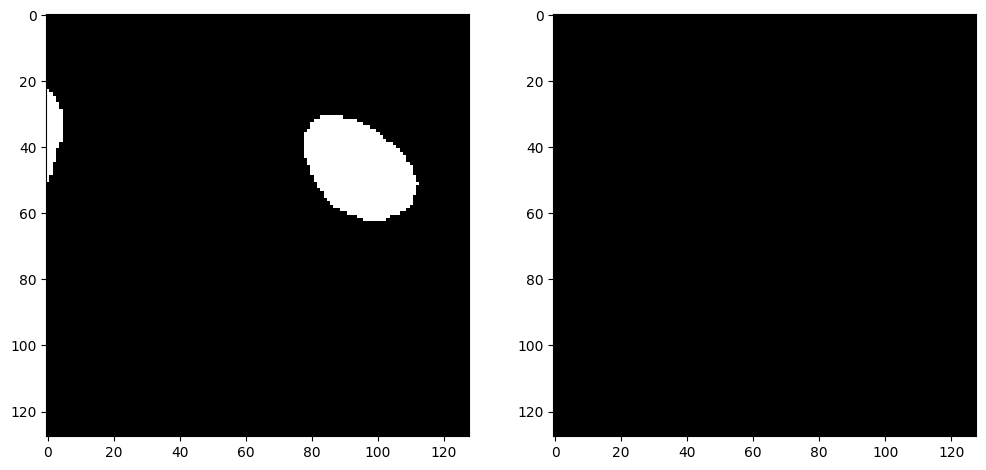

In [21]:
idc = np.random.choice(len(seg))
print("idc:", idc)
print(result[idc][0])
print(result[idc][1])

bground_arr, random_organ_arr, random_tumor_arr = seg[idc][0], seg[idc][1], seg[idc][2]

print(random_organ_arr.shape)
print(random_tumor_arr.shape)

random_pos = np.random.choice(random_tumor_arr.shape[0])
print("random_pos:", random_pos)

_, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(random_organ_arr[random_pos], cmap=plt.cm.gray)
axes[1].imshow(random_tumor_arr[random_pos], cmap=plt.cm.gray)
plt.show()


In [22]:
print(random_organ_arr.shape, random_tumor_arr.shape)
print(np.unique(bground_arr), np.unique(random_organ_arr), np.unique(random_tumor_arr))

torch.Size([80, 128, 128]) torch.Size([80, 128, 128])
[0 1] [0 1] [0 1]


In [23]:
msk = torch.stack([bground_arr, random_organ_arr, random_tumor_arr])
msk.shape

torch.Size([3, 80, 128, 128])

In [24]:
preds_max = np.argmax(msk, axis=0)
preds_max.shape

torch.Size([80, 128, 128])

In [25]:
print(np.unique(preds_max))

[0 1 2]


In [ ]:
import copy

preds_bground = copy.deepcopy(preds_max)
preds_bground[preds_max != 0] = 0
preds_bground[preds_max == 0] = 1

preds_organ = copy.deepcopy(preds_max)
preds_organ[preds_max != 1] = 0
preds_organ[preds_max == 1] = 1

preds_tumor = copy.deepcopy(preds_max)
preds_tumor[preds_max != 2] = 0
preds_tumor[preds_max == 2] = 1

print(preds_tumor.shape)
print(preds_organ.shape)

final_preds = np.stack([preds_organ, preds_tumor])
print(final_preds.shape)
print(np.unique(final_preds))

torch.Size([80, 80, 160])
torch.Size([80, 80, 160])
(2, 80, 80, 160)
[0 1]


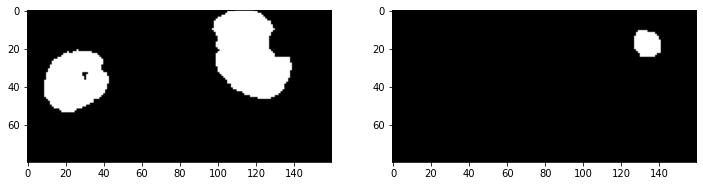

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(final_preds[0, 52], cmap=plt.cm.gray)
axes[1].imshow(final_preds[1, 52], cmap=plt.cm.gray)
plt.show()